<a href="https://colab.research.google.com/github/fasihere/MFDS-project/blob/main/q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
import statsmodels.api as sm
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
path='/content/drive/My Drive/Colab Notebooks/Dataset_Question2.xlsx'

df=pd.read_excel(path)
df.head(10)

,Temperature,Pressure,Feed Flow rate,Coolant Flow rate,Inlet reactant concentration,Test
0,406.86,17.66,121.83,2109.20,0.1033,Pass
1,693.39,24.66,133.18,3138.96,0.3785,Pass
2,523.10,23.23,146.55,1058.24,0.4799,Fail
3,612.86,40.97,94.44,1325.12,0.3147,Fail
4,500.28,37.44,185.48,2474.51,0.2284,Pass
5,413.67,44.19,84.87,3036.71,0.3293,Pass
6,537.04,38.49,114.66,3444.10,0.3669,Fail
7,405.22,31.55,74.09,1478.86,0.3647,Fail
8,560.94,25.78,134.21,1387.35,0.4170,Fail
9,522.52,49.77,170.69,2232.49,0.2544,Fail


In [ ]:
df.head()

,Temperature,Pressure,Feed Flow rate,Coolant Flow rate,Inlet reactant concentration,Test
0,406.86,17.66,121.83,2109.20,0.1033,Pass
1,693.39,24.66,133.18,3138.96,0.3785,Pass
2,523.10,23.23,146.55,1058.24,0.4799,Fail
3,612.86,40.97,94.44,1325.12,0.3147,Fail
4,500.28,37.44,185.48,2474.51,0.2284,Pass


In [ ]:
df["Test"]=df["Test"].map(lambda x:0 if x=="Fail" else 1)

In [ ]:
df.head()

,Temperature,Pressure,Feed Flow rate,Coolant Flow rate,Inlet reactant concentration,Test
0,406.86,17.66,121.83,2109.20,0.1033,1
1,693.39,24.66,133.18,3138.96,0.3785,1
2,523.10,23.23,146.55,1058.24,0.4799,0
3,612.86,40.97,94.44,1325.12,0.3147,0
4,500.28,37.44,185.48,2474.51,0.2284,1


In [ ]:
df_true=df.copy()
df_false=df.copy()


In [ ]:
drop_labels_true=[]
drop_labels_false=[]
for i in range(df_true.shape[0]):
  if df_true["Test"].values[i]==0:
    drop_labels_true.append(i)
for i in range(df_false.shape[0]):
  if df_false["Test"].values[i]==1:
    drop_labels_false.append(i)

  


In [ ]:
df_true=df_true.drop(drop_labels_true,axis=0)
df_false=df_false.drop(drop_labels_false,axis=0)

In [ ]:
df_true["Temperature"].mean()

546.1502905982896

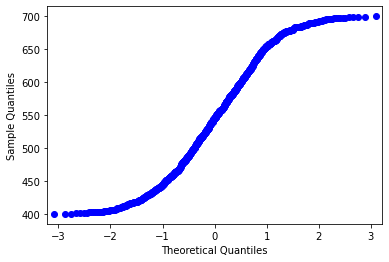

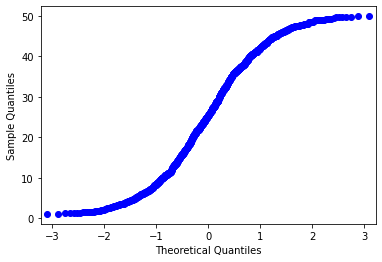

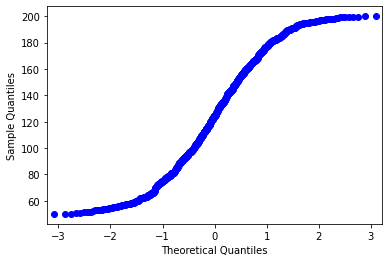

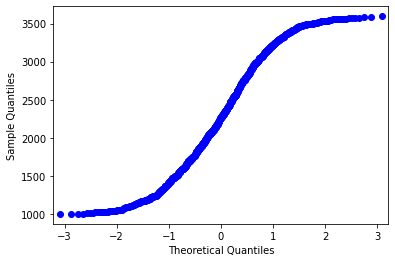

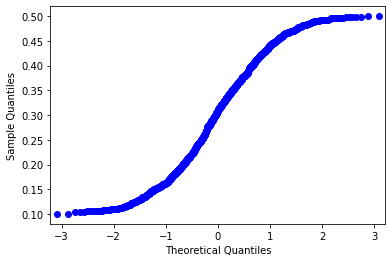

In [ ]:
sm.qqplot(df["Temperature"])
sm.qqplot(df["Pressure"])
sm.qqplot(df["Feed Flow rate"])
sm.qqplot(df["Coolant Flow rate"])
sm.qqplot(df["Inlet reactant concentration"])
plt.show()

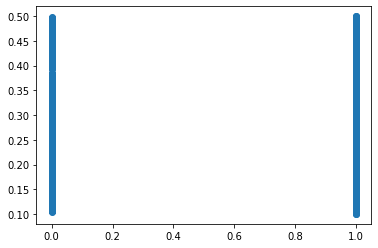

In [ ]:
plt.scatter(df["Test"],df["Inlet reactant concentration"])
plt.show()

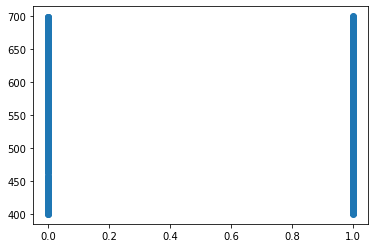

In [ ]:
plt.scatter(df["Test"],df["Temperature"],linewidth=1)
plt.show()

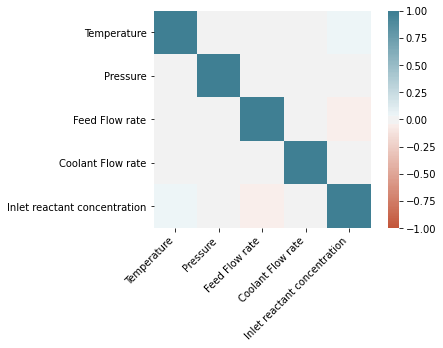

In [ ]:
corr = df.iloc[:,:5].corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [ ]:
Temp_mean=df["Temperature"].mean()
Temp_std=df["Temperature"].std()
print(Temp_mean,Temp_std)

546.7664299999994 86.85878045135449


In [ ]:
Pressure_mean=df["Pressure"].mean()
Pressure_std=df["Pressure"].std()
print(Pressure_mean,Pressure_std)

25.493269999999928 14.252407316710428


In [ ]:
feed_flow_rate_mean=df["Feed Flow rate"].mean()
feed_flow_rate_std=df["Feed Flow rate"].std()
print(feed_flow_rate_mean,feed_flow_rate_std)

125.02905999999943 43.50815916618875


In [ ]:
coolant_flow_rate_mean=df["Coolant Flow rate"].mean()
coolant_flow_rate_std=df["Coolant Flow rate"].std()
print(coolant_flow_rate_mean,coolant_flow_rate_std)

2295.7977699999924 763.6806252748243


In [ ]:
concentration_mean=df["Inlet reactant concentration"].mean()
concentration_std=df["Inlet reactant concentration"].std()
print(concentration_mean,concentration_std)

0.30269199999999974 0.11606222872639015


In [ ]:
train=df.copy()

In [ ]:
test=train["Test"].values
train=train.drop('Test',axis=1)

In [ ]:
df["Test"].value_counts(normalize=True)

1    0.585
0    0.415
Name: Test, dtype: float64

In [ ]:
Y_binarised = df["Test"].values

In [ ]:
#Train Test Split

# Shuffle dataset 
shuffle_df = df.sample(frac=1,random_)

# Define a size for your train set 
train_size = int(0.7 * len(df)) 

# Split dataset 
train_set = shuffle_df[:train_size]
test_set = shuffle_df[train_size:]
x_train=train_set.iloc[:,:5]
y_train=train_set['Test']
x_test=test_set.iloc[:,:5]
y_test=test_set['Test']
'''
#Train Test Split

# Shuffle dataset 
shuffle_df = df.sample(frac=1)
shuffle_true=df_true.sample(frac=1)
shuffle_false=df_false.sample(frac=1)

# Define a size for your train set 
train_size_true=int(0.7 * len(df_true))
train_size_false=int(0.7 * len(df_false))

# Split dataset 
train_true = shuffle_true[:train_size_true]
test_true = shuffle_true[train_size_true:]
train_false = shuffle_false[:train_size_false]
test_false = shuffle_false[train_size_false:]
train_set=pd.concat((train_true,train_false))
test_set=pd.concat((test_true,test_false))

train_set=train_set.sample(frac=1)
test_set=test_set.sample(frac=1)

# Split dataset 
x_train=train_set.iloc[:,:5]
y_train=train_set['Test']
x_test=test_set.iloc[:,:5]
y_test=test_set['Test']

train_set.head()'''

SyntaxError: ignored

In [ ]:
A=x_train.copy()
for row in A:
  A[row]=A[row].astype(float)

In [ ]:
mean=[]
std=[]
for row in x_train:
  mean.append(x_train[row].mean())
  std.append(x_train[row].std())


In [ ]:
print(mean,std)

[546.5957285714281, 25.44141428571424, 127.31819999999945, 2289.374885714277, 0.3005857142857139] [86.92903444072086, 14.025286876201074, 42.94797551078454, 771.4713232378658, 0.11762908410137217]


In [ ]:
for row in x_train:
  for i in range(x_train.shape[0]):
    a=(x_train[row].values[i]-x_train[row].mean())
    b=a/x_train[row].std()
    #print(a,b,row)
    A[row].values[i]=b
    #print(A)
#print(train.head())

In [ ]:
A.mean()

Temperature                    -4.741644e-16
Pressure                        6.867522e-17
Feed Flow rate                  4.980936e-15
Coolant Flow rate               5.644691e-15
Inlet reactant concentration   -8.967430e-16
dtype: float64

In [ ]:
B=x_test.copy()
for row in B:
  B[row]=B[row].astype(float)

In [ ]:
for row,j in zip(x_test,range(5)):
  for i in range(x_test.shape[0]):
    a=(x_test[row].values[i]-mean[j])
    b=a/std[j]
    #print(a,b,row)
    B[row].values[i]=b

In [ ]:
B.mean()

Temperature                     0.006546
Pressure                        0.012324
Feed Flow rate                 -0.177668
Coolant Flow rate               0.027752
Inlet reactant concentration    0.059687
dtype: float64

In [ ]:
A=np.array(A)
B=np.array(B)
print(A,B)

[[ 0.01592416 -0.81577043 -0.7666997  -1.2926921   1.52355421]
 [ 0.42096719  1.2747394  -0.11591233 -0.67246166  1.24131108]
 [-0.24946474  0.6964981   0.17583599 -0.931551    0.20415262]
 ...
 [-0.0279047   0.23590146  0.05708767  0.51445219  0.9403651 ]
 [ 1.53877553 -1.64855197 -0.26935379 -1.25284616 -0.08574167]
 [-0.10992563  0.93036141 -0.29473333  1.49678294  0.56375756]] [[-0.36335074  0.06692096 -1.1289985  -0.43934865  0.83239861]
 [ 1.52163512  0.5973914  -1.13738074  0.6670567   1.32462381]
 [ 1.57627739  0.60238238  0.83640264  1.37196949  1.60771706]
 ...
 [-0.76482764 -1.26210711  0.54162739 -0.36488056  0.38863081]
 [-1.59849617  0.52395261 -1.48617483  0.7985846  -0.3424809 ]
 [-0.30870846 -1.18938132 -1.50503485 -0.05592546  0.34697444]]


In [ ]:
B.mean()

-0.01427176515687969

In [ ]:
y_train=np.array(y_train)
y_test=np.array(y_test)

In [ ]:
class SigmoidNeuron:
  
  def _init_(self):
    self.w = None
    self.b = None
    
  def perceptron(self, x):
    #print(np.dot(x, self.w.T) + self.b)
    return np.dot(x, self.w.T) + self.b
  
  def sigmoid(self, x):
    #print(1.0/(1.0 + np.exp(-x)))
    return 1.0/(1.0 + np.exp(-x))
  
  def grad_w(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    #print(y,y_pred,y-y_pred)
    #print((y_pred - y) * y_pred * (1 - y_pred) * x)
    return (y_pred - y) * y_pred * (1 - y_pred) * x
  
  def grad_b(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred)
  
  

  
  def fit(self, X, Y, epochs=1, learning_rate=1, initialise=True, display_loss=False):
    
    # initialise w, b
    if initialise:
      self.w = np.random.randn(1,X.shape[1])
      self.b = 0
      print(self.w)
      
    if display_loss:
      loss = []
      #loss1=0
    
    for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      dw = 0
      db = 0
      for x, y in zip(X, Y):
        #print(self.grad_w(x,y))
        dw += self.grad_w(x, y)
        db += self.grad_b(x, y) 
      #print("dw",dw)      
      self.w -= learning_rate * dw
      self.b -= learning_rate * db
      #print("w",self.w)
      if display_loss:
        loss1=0
        for x, y in zip(X, Y):
          y_pred = self.sigmoid(self.perceptron(x))
        #loss.append(log_loss(Y,Y_pred))
          loss1+=(-(y*np.log(y_pred) + (1 - y)*np.log(1 - y_pred)))
        loss.append(loss1/700)
        
    
    if display_loss:
      
      #print(epochs)
      plt.plot(loss)
      
      plt.xlabel('Epochs')
      plt.ylabel('Log_Loss')
      plt.show()
      
  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.sigmoid(self.perceptron(x))
      Y_pred.append(y_pred)
    return np.array(Y_pred)

[[ 1.1631484   0.20417425  0.04533842 -0.50793457  2.31404068]]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


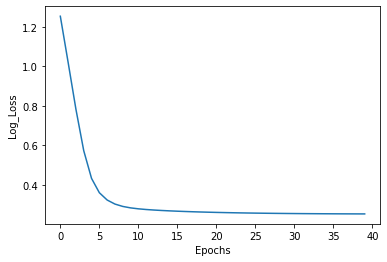

In [ ]:
sn = SigmoidNeuron()
sn.fit(A, y_train, epochs=40, learning_rate=0.015, display_loss=True)

In [ ]:
Y_pred_train = sn.predict(A)
Y_pred_test = sn.predict(B)

In [ ]:
Y_pred_binarised_train = (Y_pred_train > 0.5).astype("int").ravel()
Y_pred_binarised_test = (Y_pred_test > 0.5).astype("int").ravel()

In [ ]:
def accuracy(y_pred,y):
  correct=0
  for i in range(len(y)):
    if y[i]==y_pred[i]:
      correct+=1
      #print(correct)
  return 100*correct/len(y)

In [ ]:
accuracy_train = accuracy(Y_pred_binarised_train, y_train)
accuracy_test  = accuracy(Y_pred_binarised_test, y_test)

In [ ]:
print(accuracy_train, accuracy_test)

95.42857142857143 94.0


In [ ]:
def confusion(y_pred,y):
  true_positive=0
  true_negative=0
  false_positive=0
  false_negative=0
  for i in range(len(y)):
    if y[i]==y_pred[i] and y[i]==1:
      true_positive+=1
    if y[i]==1 and y_pred[i]==0:
      false_negative+=1
    if y[i]==0 and y_pred[i]==1:
      false_positive+=1
    if y[i]==y_pred[i] and y[i]==0:
      true_negative+=1

  A=np.random.randn(2,2)
  A[1,1]=true_positive
  A[0,0]=true_negative
  A[1,0]=false_positive
  A[0,1]=false_negative
  return A

In [ ]:
B=confusion(y_train,Y_pred_binarised_train)
print("confusion_matrix")
print(B)

precision=B[1,1]/(B[1,1]+B[0,1])
print("precision",precision)
recall=B[1,1]/(B[1,1]+B[1,0])
print("recall",recall)
f1=2*precision*recall/(precision+recall)
print("f1",f1)

confusion_matrix
[[286.  17.]
 [ 15. 382.]]
precision 0.9573934837092731
recall 0.9622166246851386
f1 0.9597989949748744


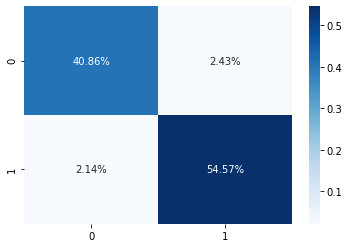

In [ ]:
#Visualizing confusion matrix
sns.heatmap(B/np.sum(B), annot=True, fmt='.2%', cmap='Blues')